# Venice Astronomical Tide Data Cleaning
### By Cyril Michino Chege, 3117300, Bocconi University
In this notebook, we'll be consolidate data on stronomical tides from different meteorological stations in Venice into a single tidy dataset. This notebook will explore data from the following sources:
- Data on Atronomical Tide Levels 2022 and 2023
- Data from the following stations in venice:
    - Stazione Burano
    - Stazione Diga Sud Lido
    - Stazione Misericordia
    - Stazione Palazzo Cavalli
    - Stazione Piattaforma PG
    - Stazione Piattaforma
    - Stazione Punta Salute (Canal Grande)
    - Stazione San Giorgio

Additional project descriptions and in-depth details on the data can be found on the `README` of this repository.


In [2]:
import warnings
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('once')
%matplotlib inline

/Users/cyrilmichino/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Astronomical Tides Data

### Astronomical Tides 2022

In [3]:
# Import astronomical tides data 2022
astro_tide_2022 = pd.read_json('raw_data/astronomical_tide_2022.json')

astro_tide_2022.rename(columns={'data':'date','valore':'value'}, inplace=True) #Translate column names from Italian
astro_tide_2022['date'] = pd.to_datetime(astro_tide_2022.date) #Convert the date column into a datetime object

print(astro_tide_2022.head())
print(astro_tide_2022.tail())

                 date  value
0 2022-01-01 00:00:00     45
1 2022-01-01 00:05:00     44
2 2022-01-01 00:10:00     43
3 2022-01-01 00:15:00     42
4 2022-01-01 00:20:00     42
                      date  value
105115 2022-12-31 23:35:00     18
105116 2022-12-31 23:40:00     19
105117 2022-12-31 23:45:00     19
105118 2022-12-31 23:50:00     19
105119 2022-12-31 23:55:00     19


In [4]:
# Explore the astronomical tides data
astro_tide_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    105120 non-null  datetime64[ns]
 1   value   105120 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 MB


In [5]:
# Convert the date column into a date object then explore the data summary
astro_tide_2022.describe()

,value
count,105120.000000
mean,32.222108
std,24.179518
min,-34.000000
25%,15.000000
50%,34.000000
75%,50.000000
max,87.000000


The dataset contains **105,120 observations** across two columns, one with the **date** and the other with the **value** (astronomical tide value). No missing values in the dataset. The data is focused on 2022 with dates ranging from Jan 1st to Dec 31, 2022. The astro tides values across the year range from -34 to 87 with an avergae of 32.222.

### Astronomical Tides 2023

In [6]:
# Import astronomical tides data 2023
astro_tide_2023 = pd.read_json('raw_data/astronomical_tide_2023.json')

astro_tide_2023.rename(columns={'data':'date','valore':'value'}, inplace=True) #Translate column names from Italian
astro_tide_2023['date'] = pd.to_datetime(astro_tide_2023.date) #Convert the date column into a datetime object

print(astro_tide_2023.head())
print(astro_tide_2023.tail())

                 date  value
0 2023-01-01 00:00:00     21
1 2023-01-01 00:05:00     22
2 2023-01-01 00:10:00     22
3 2023-01-01 00:15:00     22
4 2023-01-01 00:20:00     23
                      date  value
105115 2023-12-31 23:35:00     38
105116 2023-12-31 23:40:00     39
105117 2023-12-31 23:45:00     40
105118 2023-12-31 23:50:00     41
105119 2023-12-31 23:55:00     42


In [7]:
astro_tide_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    105120 non-null  datetime64[ns]
 1   value   105120 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 MB


In [8]:
astro_tide_2023.describe()

,value
count,105120.000000
mean,32.662072
std,24.391790
min,-33.000000
25%,15.000000
50%,34.000000
75%,51.000000
max,86.000000


The dataset is very similar in structure to `astro_tide_2022`. The dataset also contains **105,120 observations** across two columns, one with the **date** and the other with the **value** (astronomical tide value). No missing values in the dataset. The data is focused on 2023 with dates ranging from Jan 1st to Dec 31, 2023. The astro tides values across the year range from -33 to 86 with an avergae of 32.662.

### Data Consolidation
We'll now combine the two datasets on astronomical tides, `astro_tides_2022` and `astro_tides_2023` to create one consolidated dataset with dates ranging from January 1st 2022 to December 31st, 2023.

In [9]:
# Concatenate the data to remain with the two columns but consolidated rows
astro_tide = pd.concat([astro_tide_2022,astro_tide_2023], ignore_index=True)
print(astro_tide.head())
print(astro_tide.tail())

                 date  value
0 2022-01-01 00:00:00     45
1 2022-01-01 00:05:00     44
2 2022-01-01 00:10:00     43
3 2022-01-01 00:15:00     42
4 2022-01-01 00:20:00     42
                      date  value
210235 2023-12-31 23:35:00     38
210236 2023-12-31 23:40:00     39
210237 2023-12-31 23:45:00     40
210238 2023-12-31 23:50:00     41
210239 2023-12-31 23:55:00     42


In [10]:
# General Data Info on Conslidation
astro_tide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    210240 non-null  datetime64[ns]
 1   value   210240 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB


We now have a consolidated dataset with data from Astronomical tides from 2022 to 2023. We have also reduced the time interval from 5 minute blocks to one hour block with value maintained as an average of the tide values across the hour.We'll use this as the anchor dataset where data from the different Venice stations will be consolidated into.

## Data from Stations

### Stazione Burano

In [11]:
burano_station = pd.read_csv('raw_data/Stazione_Burano.csv', delimiter=';') #Import data from Burano Station
burano_station.head()


,Data,Burano Liv.Idrom. medio 1m
0,2022-11-10 00:00:00,0.66
1,2022-11-10 00:05:00,0.67
2,2022-11-10 00:10:00,0.67
3,2022-11-10 00:15:00,0.67
4,2022-11-10 00:20:00,0.67


In [12]:
burano_station.rename(columns={'Data':'date','Burano Liv.Idrom. medio 1m':'burano_tide_level'}, inplace=True) #Transalte column names to English
burano_station['date'] = pd.to_datetime(burano_station.date) #Convert the date column into a datetime object

burano_station.tail()

,date,burano_tide_level
26491,2023-02-09 23:40:00,0.12
26492,2023-02-09 23:45:00,0.13
26493,2023-02-09 23:50:00,0.14
26494,2023-02-09 23:55:00,0.15
26495,2023-02-10 00:00:00,0.16


In [13]:
burano_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               26496 non-null  datetime64[ns]
 1   burano_tide_level  26496 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 414.1 KB


In [14]:
#Conslidate data to the main dataframe
astro_tide = astro_tide.merge(burano_station, how='outer', on='date')
astro_tide.head()

,date,value,burano_tide_level
0,2022-01-01 00:00:00,45,NaN
1,2022-01-01 00:05:00,44,NaN
2,2022-01-01 00:10:00,43,NaN
3,2022-01-01 00:15:00,42,NaN
4,2022-01-01 00:20:00,42,NaN


In [15]:
astro_tide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210240 entries, 0 to 210239
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               210240 non-null  datetime64[ns]
 1   value              210240 non-null  int64         
 2   burano_tide_level  26496 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 6.4 MB


### Stazione Diga Sud Lido

In [16]:
diga_station = pd.read_csv('raw_data/Stazione_DigaSudLido.csv', delimiter=';')
diga_station.head()

,Data,D.S. Lido Liv.Idrom. medio 1m,Faro Diga Lido V.Vento med.10m,Faro Diga Lido V.Vento max,Faro Diga Lido D.Vento med. 10m
0,2022-11-10 00:00:00,0.65,3.8,4.5,23
1,2022-11-10 00:05:00,0.64,3.9,4.5,31
2,2022-11-10 00:10:00,0.64,3.6,4.3,33
3,2022-11-10 00:15:00,0.63,3.6,4.5,34
4,2022-11-10 00:20:00,0.62,3.7,4.3,38


In [17]:
diga_station.rename(columns={'Data':'date','D.S. Lido Liv.Idrom. medio 1m':'diga_tide_level','Faro Diga Lido V.Vento med.10m':'diga_average_wind_speed','Faro Diga Lido V.Vento max':'diga_max_wind_speed','Faro Diga Lido D.Vento med. 10m':'diga_wind_direction'}, inplace=True) #Transalte column names to English
diga_station['date'] = pd.to_datetime(diga_station.date) #Convert the date column into a datetime object

diga_station.tail()

,date,diga_tide_level,diga_average_wind_speed,diga_max_wind_speed,diga_wind_direction
26492,2023-02-09 23:40:00,0.32,2.3,2.9,339
26493,2023-02-09 23:45:00,0.33,2.4,2.8,336
26494,2023-02-09 23:50:00,0.33,2.2,2.4,340
26495,2023-02-09 23:55:00,0.33,2.1,2.8,333
26496,2023-02-10 00:00:00,0.34,2.2,2.7,343


In [18]:
diga_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26497 entries, 0 to 26496
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     26497 non-null  datetime64[ns]
 1   diga_tide_level          26497 non-null  float64       
 2   diga_average_wind_speed  26497 non-null  float64       
 3   diga_max_wind_speed      26497 non-null  float64       
 4   diga_wind_direction      26497 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.0 MB


In [19]:
#Conslidate data to the main dataframe
astro_tide = astro_tide.merge(diga_station, how='outer', on='date')
astro_tide.head()

,date,value,burano_tide_level,diga_tide_level,diga_average_wind_speed,diga_max_wind_speed,diga_wind_direction
0,2022-01-01 00:00:00,45,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:05:00,44,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:10:00,43,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:15:00,42,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:20:00,42,NaN,NaN,NaN,NaN,NaN


In [20]:
astro_tide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210240 entries, 0 to 210239
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     210240 non-null  datetime64[ns]
 1   value                    210240 non-null  int64         
 2   burano_tide_level        26496 non-null   float64       
 3   diga_tide_level          26497 non-null   float64       
 4   diga_average_wind_speed  26497 non-null   float64       
 5   diga_max_wind_speed      26497 non-null   float64       
 6   diga_wind_direction      26497 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.8 MB


### Stazione Misericordia

In [21]:
misericordia_station = pd.read_csv('raw_data/Stazione_Misericordia.csv', delimiter=';')
misericordia_station.head()

,Data,Misericordia Liv.Idrom. medio 1m,Misericordia D.Vento med. 10m,Misericordia V.Vento med.10m,Misericordia V.Vento max,Misericordia Onda: Alt. sign.,Misericordia Onda: Alt. max
0,2022-11-10 00:00:00,0.71,12,3.0,3.8,0.14,0.20
1,2022-11-10 00:05:00,0.71,10,3.1,3.8,0.12,0.22
2,2022-11-10 00:10:00,0.71,13,3.2,3.9,0.10,0.18
3,2022-11-10 00:15:00,0.71,11,3.3,4.0,0.10,0.16
4,2022-11-10 00:20:00,0.71,29,3.3,3.8,0.10,0.18


In [22]:
misericordia_station.rename(columns={'Data':'date','Misericordia Liv.Idrom. medio 1m':'miseri_tide_level','Misericordia V.Vento med.10m':'miseri_average_wind_speed','Misericordia V.Vento max':'miseri_max_wind_speed','Misericordia D.Vento med. 10m':'miseri_wind_direction','Misericordia Onda: Alt. sign.':'miseri_sign_wave_height','Misericordia Onda: Alt. max':'miseri_max_wave_height'}, inplace=True) #Transalte column names to English
misericordia_station['date'] = pd.to_datetime(misericordia_station.date) #Convert the date column into a datetime object

misericordia_station.tail()

,date,miseri_tide_level,miseri_wind_direction,miseri_average_wind_speed,miseri_max_wind_speed,miseri_sign_wave_height,miseri_max_wave_height
26492,2023-02-09 23:40:00,0.21,340,1.8,2.2,0.08,0.20
26493,2023-02-09 23:45:00,0.22,335,1.6,1.8,0.08,0.14
26494,2023-02-09 23:50:00,0.23,281,1.1,0.9,0.06,0.14
26495,2023-02-09 23:55:00,0.24,283,0.6,0.9,0.04,0.09
26496,2023-02-10 00:00:00,0.25,300,0.4,0.7,0.04,0.06


In [23]:
misericordia_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26497 entries, 0 to 26496
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       26497 non-null  datetime64[ns]
 1   miseri_tide_level          26497 non-null  float64       
 2   miseri_wind_direction      26497 non-null  int64         
 3   miseri_average_wind_speed  26497 non-null  float64       
 4   miseri_max_wind_speed      26497 non-null  float64       
 5   miseri_sign_wave_height    25227 non-null  float64       
 6   miseri_max_wave_height     25227 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.4 MB


In [24]:
#Conslidate data to the main dataframe
astro_tide = astro_tide.merge(misericordia_station, how='outer', on='date')
astro_tide.head()

,date,value,burano_tide_level,diga_tide_level,diga_average_wind_speed,diga_max_wind_speed,diga_wind_direction,miseri_tide_level,miseri_wind_direction,miseri_average_wind_speed,miseri_max_wind_speed,miseri_sign_wave_height,miseri_max_wave_height
0,2022-01-01 00:00:00,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:05:00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:10:00,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:15:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:20:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
astro_tide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210240 entries, 0 to 210239
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       210240 non-null  datetime64[ns]
 1   value                      210240 non-null  int64         
 2   burano_tide_level          26496 non-null   float64       
 3   diga_tide_level            26497 non-null   float64       
 4   diga_average_wind_speed    26497 non-null   float64       
 5   diga_max_wind_speed        26497 non-null   float64       
 6   diga_wind_direction        26497 non-null   float64       
 7   miseri_tide_level          26497 non-null   float64       
 8   miseri_wind_direction      26497 non-null   float64       
 9   miseri_average_wind_speed  26497 non-null   float64       
 10  miseri_max_wind_speed      26497 non-null   float64       
 11  miseri_sign_wave_height    25227 non-null   float64 

### Stazione Palazzo Cavalli

In [26]:
palazzo_station = pd.read_csv('raw_data/Stazione_PalazzoCavalli.csv', delimiter=';')
palazzo_station.head()

,Data,Palazzo Cavalli Pressione,Palazzo Cavalli Temperatura,Palazzo Cavalli Umidita',Palazzo Cavalli Radiazione solare,Palazzo Cavalli Pioggia 5m
0,2022-11-10 00:00:00,1018.9,14.3,77,0.0,0.0
1,2022-11-10 00:05:00,1018.9,14.1,78,0.0,0.0
2,2022-11-10 00:10:00,1018.8,14.2,78,0.0,0.0
3,2022-11-10 00:15:00,1018.8,14.2,78,0.0,0.0
4,2022-11-10 00:20:00,1018.7,14.2,78,0.0,0.0


In [27]:
palazzo_station.rename(columns={'Data':'date','Palazzo Cavalli Pressione':'palazzo_pressure','Palazzo Cavalli Temperatura':'palazzo_temperature',"Palazzo Cavalli Umidita'":'palazzo_humidity','Palazzo Cavalli Radiazione solare':'palazzo_solar','Palazzo Cavalli Pioggia 5m':'palazzo_precipitation'}, inplace=True) #Transalte column names to English
palazzo_station['date'] = pd.to_datetime(palazzo_station.date) #Convert the date column into a datetime object

palazzo_station.tail()

,date,palazzo_pressure,palazzo_temperature,palazzo_humidity,palazzo_solar,palazzo_precipitation
26490,2023-02-09 23:40:00,1036.1,2.9,52,NaN,0.0
26491,2023-02-09 23:45:00,1036.1,2.9,54,0.0,0.0
26492,2023-02-09 23:50:00,1036.1,2.4,56,0.0,0.0
26493,2023-02-09 23:55:00,1036.1,2.7,55,0.0,0.0
26494,2023-02-10 00:00:00,1036.1,2.1,55,0.0,0.0


In [28]:
palazzo_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26495 entries, 0 to 26494
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   26495 non-null  datetime64[ns]
 1   palazzo_pressure       26495 non-null  float64       
 2   palazzo_temperature    26495 non-null  float64       
 3   palazzo_humidity       26495 non-null  int64         
 4   palazzo_solar          22037 non-null  float64       
 5   palazzo_precipitation  26495 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.2 MB


In [29]:
#Conslidate data to the main dataframe
astro_tide = astro_tide.merge(palazzo_station, how='outer', on='date')
astro_tide.head()

,date,value,burano_tide_level,diga_tide_level,diga_average_wind_speed,diga_max_wind_speed,diga_wind_direction,miseri_tide_level,miseri_wind_direction,miseri_average_wind_speed,miseri_max_wind_speed,miseri_sign_wave_height,miseri_max_wave_height,palazzo_pressure,palazzo_temperature,palazzo_humidity,palazzo_solar,palazzo_precipitation
0,2022-01-01 00:00:00,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:05:00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:10:00,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:15:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:20:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
astro_tide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210240 entries, 0 to 210239
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       210240 non-null  datetime64[ns]
 1   value                      210240 non-null  int64         
 2   burano_tide_level          26496 non-null   float64       
 3   diga_tide_level            26497 non-null   float64       
 4   diga_average_wind_speed    26497 non-null   float64       
 5   diga_max_wind_speed        26497 non-null   float64       
 6   diga_wind_direction        26497 non-null   float64       
 7   miseri_tide_level          26497 non-null   float64       
 8   miseri_wind_direction      26497 non-null   float64       
 9   miseri_average_wind_speed  26497 non-null   float64       
 10  miseri_max_wind_speed      26497 non-null   float64       
 11  miseri_sign_wave_height    25227 non-null   float64 

### Stazione Piattaforma PG

In [31]:
pg_piattaforma_station = pd.read_csv('raw_data/Stazione_Piattaforma_pg.csv', delimiter=';')
pg_piattaforma_station.head()

,Data,Piattaforma CNR Pioggia 5m
0,2022-11-10 00:00:00,0.0
1,2022-11-10 01:00:00,0.0
2,2022-11-10 02:00:00,0.0
3,2022-11-10 03:00:00,0.0
4,2022-11-10 04:00:00,0.0


In [32]:
pg_piattaforma_station.rename(columns={'Data':'date','Piattaforma CNR Pioggia 5m':'pg_piatta_precipitation'}, inplace=True) #Transalte column names to English
pg_piattaforma_station['date'] = pd.to_datetime(pg_piattaforma_station.date) #Convert the date column into a datetime object

pg_piattaforma_station.tail()

,date,pg_piatta_precipitation
2204,2023-02-09 20:00:00,0.0
2205,2023-02-09 21:00:00,0.0
2206,2023-02-09 22:00:00,0.0
2207,2023-02-09 23:00:00,0.0
2208,2023-02-10 00:00:00,0.0


In [33]:
pg_piattaforma_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     2209 non-null   datetime64[ns]
 1   pg_piatta_precipitation  2209 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.6 KB


In [34]:
#Conslidate data to the main dataframe
astro_tide = astro_tide.merge(pg_piattaforma_station, how='outer', on='date')
astro_tide.head()

,date,value,burano_tide_level,diga_tide_level,diga_average_wind_speed,diga_max_wind_speed,diga_wind_direction,miseri_tide_level,miseri_wind_direction,miseri_average_wind_speed,miseri_max_wind_speed,miseri_sign_wave_height,miseri_max_wave_height,palazzo_pressure,palazzo_temperature,palazzo_humidity,palazzo_solar,palazzo_precipitation,pg_piatta_precipitation
0,2022-01-01 00:00:00,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:05:00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:10:00,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:15:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:20:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
astro_tide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210240 entries, 0 to 210239
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       210240 non-null  datetime64[ns]
 1   value                      210240 non-null  int64         
 2   burano_tide_level          26496 non-null   float64       
 3   diga_tide_level            26497 non-null   float64       
 4   diga_average_wind_speed    26497 non-null   float64       
 5   diga_max_wind_speed        26497 non-null   float64       
 6   diga_wind_direction        26497 non-null   float64       
 7   miseri_tide_level          26497 non-null   float64       
 8   miseri_wind_direction      26497 non-null   float64       
 9   miseri_average_wind_speed  26497 non-null   float64       
 10  miseri_max_wind_speed      26497 non-null   float64       
 11  miseri_sign_wave_height    25227 non-null   float64 

### Stazione Piattaforma

In [36]:
piattaforma_station = pd.read_csv('raw_data/Stazione_Piattaforma.csv', delimiter=';')
piattaforma_station.head()

,Data,Piattaforma CNR Liv.Idrom. medio 1m,Piattaforma CNR D.Vento med. 10m,Piattaforma CNR V.Vento med.10m,Piattaforma CNR V.Vento max,Piattaforma CNR Onda: Alt. sign.,Piattaforma CNR Onda: Alt. max,Piattaforma CNR Pressione,Piattaforma CNR Temperatura,Piattaforma CNR Temp. Acqua,Piattaforma CNR Umidita',Piattaforma CNR Radiazione solare,Piattaforma CNR Pioggia 5m
0,2022-11-10 00:00:00,0.64,31.0,6.0,7.2,0.28,0.51,1018.5,15.6,18.5,75.0,NaN,0.0
1,2022-11-10 00:05:00,0.63,34.0,6.3,7.0,0.28,0.51,1018.5,15.5,18.5,75.0,NaN,0.0
2,2022-11-10 00:10:00,0.63,32.0,6.6,7.6,0.28,0.51,1018.4,15.5,18.7,74.0,NaN,0.0
3,2022-11-10 00:15:00,0.62,36.0,6.8,7.1,0.26,0.47,1018.3,15.4,18.4,74.0,NaN,0.0
4,2022-11-10 00:20:00,0.61,35.0,6.8,7.8,0.26,0.47,1018.4,15.4,18.6,76.0,NaN,0.0


In [37]:
piattaforma_station.rename(columns={'Data':'date','Piattaforma CNR Liv.Idrom. medio 1m':'piatta_tide_level','Piattaforma CNR D.Vento med. 10m':'piatta_wind_direction','Piattaforma CNR V.Vento med.10m':'piatta_average_wind_speed','Piattaforma CNR V.Vento max':'piatta_max_wind_speed','Piattaforma CNR Onda: Alt. sign.':'piatta_sign_wave_height','Piattaforma CNR Onda: Alt. max':'piatta_max_wave_height','Piattaforma CNR Pressione':'piatta_pressure','Piattaforma CNR Temperatura':'piatta_temperature','Piattaforma CNR Temp. Acqua':'piatta_water_temperature',"Piattaforma CNR Umidita'":'piatta_humidity','Piattaforma CNR Radiazione solare':'piatta_solar','Piattaforma CNR Pioggia 5m':'piatta_precipitation'}, inplace=True) #Transalte column names to English
piattaforma_station['date'] = pd.to_datetime(piattaforma_station.date) #Convert the date column into a datetime object

piattaforma_station.tail()

,date,piatta_tide_level,piatta_wind_direction,piatta_average_wind_speed,piatta_max_wind_speed,piatta_sign_wave_height,piatta_max_wave_height,piatta_pressure,piatta_temperature,piatta_water_temperature,piatta_humidity,piatta_solar,piatta_precipitation
26489,2023-02-09 23:40:00,0.31,324.0,4.8,5.6,0.46,0.76,1035.7,4.0,9.9,46.0,NaN,0.0
26490,2023-02-09 23:45:00,0.32,321.0,4.7,5.7,0.48,0.87,1035.7,4.0,9.9,48.0,NaN,0.0
26491,2023-02-09 23:50:00,0.32,327.0,4.6,5.1,0.48,0.87,1035.7,4.1,10.0,49.0,NaN,0.0
26492,2023-02-09 23:55:00,0.32,338.0,4.6,5.8,0.48,0.87,1035.7,4.0,9.9,52.0,NaN,0.0
26493,2023-02-10 00:00:00,0.33,341.0,4.6,5.8,0.56,0.99,1035.6,3.9,9.9,54.0,NaN,0.0


In [38]:
piattaforma_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26494 entries, 0 to 26493
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       26494 non-null  datetime64[ns]
 1   piatta_tide_level          26476 non-null  float64       
 2   piatta_wind_direction      26488 non-null  float64       
 3   piatta_average_wind_speed  26489 non-null  float64       
 4   piatta_max_wind_speed      26488 non-null  float64       
 5   piatta_sign_wave_height    26476 non-null  float64       
 6   piatta_max_wave_height     26476 non-null  float64       
 7   piatta_pressure            26487 non-null  float64       
 8   piatta_temperature         26487 non-null  float64       
 9   piatta_water_temperature   26487 non-null  float64       
 10  piatta_humidity            26487 non-null  float64       
 11  piatta_solar               10808 non-null  float64       
 12  piat

In [39]:
#Conslidate data to the main dataframe
astro_tide = astro_tide.merge(piattaforma_station, how='outer', on='date')
astro_tide.head()

,date,value,burano_tide_level,diga_tide_level,diga_average_wind_speed,diga_max_wind_speed,diga_wind_direction,miseri_tide_level,miseri_wind_direction,miseri_average_wind_speed,...,piatta_average_wind_speed,piatta_max_wind_speed,piatta_sign_wave_height,piatta_max_wave_height,piatta_pressure,piatta_temperature,piatta_water_temperature,piatta_humidity,piatta_solar,piatta_precipitation
0,2022-01-01 00:00:00,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:05:00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:10:00,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:15:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:20:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
astro_tide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210240 entries, 0 to 210239
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       210240 non-null  datetime64[ns]
 1   value                      210240 non-null  int64         
 2   burano_tide_level          26496 non-null   float64       
 3   diga_tide_level            26497 non-null   float64       
 4   diga_average_wind_speed    26497 non-null   float64       
 5   diga_max_wind_speed        26497 non-null   float64       
 6   diga_wind_direction        26497 non-null   float64       
 7   miseri_tide_level          26497 non-null   float64       
 8   miseri_wind_direction      26497 non-null   float64       
 9   miseri_average_wind_speed  26497 non-null   float64       
 10  miseri_max_wind_speed      26497 non-null   float64       
 11  miseri_sign_wave_height    25227 non-null   float64 

#### Analysing potentially duplicate data

In [53]:
piatta_redacted = pd.DataFrame() #Create Dataframe to contain only dates and precipatation data from Piattaforma
piatta_redacted['precipitation'] = piattaforma_station.piatta_precipitation
piatta_redacted['date'] = piattaforma_station.date

# Let us merge data from Piattaforma with data from Piataforma PG
## We'll conduct an inner join so that we only maintain observatioons with similar dates
piatta_compare = pg_piattaforma_station.merge(piatta_redacted, how='inner', on='date')
print(piatta_compare.info())
piatta_compare.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2208
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     2209 non-null   datetime64[ns]
 1   pg_piatta_precipitation  2209 non-null   float64       
 2   precipitation            2209 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 69.0 KB
None


,date,pg_piatta_precipitation,precipitation
0,2022-11-10 00:00:00,0.0,0.0
1,2022-11-10 01:00:00,0.0,0.0
2,2022-11-10 02:00:00,0.0,0.0
3,2022-11-10 03:00:00,0.0,0.0
4,2022-11-10 04:00:00,0.0,0.0


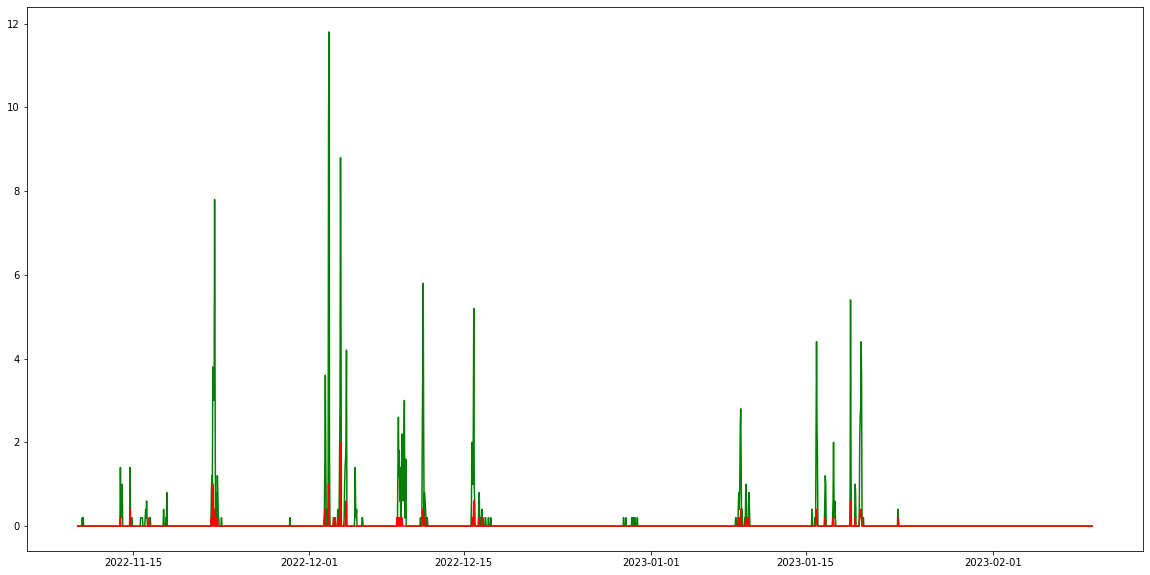

In [55]:
# Let us visualise preipitation data from Piattaforma PG and Piattaforma
plt.figure(figsize=(20,10))
plt.plot(piatta_compare.date, piatta_compare.pg_piatta_precipitation, 'g') #Precipitation data from Piattaforma PG
plt.plot(piatta_compare.date, piatta_compare.precipitation,'r') #Precipitation data from Piattaforma
plt.show()

From the visualisation, we can see that there is no data alignment between the two columns and therefore the two columns are not duplicates and will both be maintained in the dataset.

### Stazione Punta Salute (Canal Grande)

In [56]:
punta_station = pd.read_csv('raw_data/Stazione_PuntaSalute_CanalGrande.csv', delimiter=';')
punta_station.head()

,Data,P. Salute Liv.Idrom. medio 1m,P. Salute Temp. Acqua
0,2022-08-10 00:00:00,0.32,26.9
1,2022-08-10 00:05:00,0.30,27.8
2,2022-08-10 00:10:00,0.27,27.9
3,2022-08-10 00:15:00,0.26,26.9
4,2022-08-10 00:20:00,0.24,27.8


In [59]:
punta_station.rename(columns={'Data':'date','P. Salute Liv.Idrom. medio 1m':'punta_tide_level','P. Salute Temp. Acqua':'punta_water_temperature'}, inplace=True) #Transalte column names to English
punta_station['date'] = pd.to_datetime(punta_station.date) #Convert the date column into a datetime object

punta_station.tail()

,date,punta_tide_level,punta_water_temperature
52985,2023-02-09 23:40:00,0.24,5.8
52986,2023-02-09 23:45:00,0.25,5.8
52987,2023-02-09 23:50:00,0.26,5.9
52988,2023-02-09 23:55:00,0.26,5.9
52989,2023-02-10 00:00:00,0.27,5.9


In [60]:
punta_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52990 entries, 0 to 52989
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     52990 non-null  datetime64[ns]
 1   punta_tide_level         52961 non-null  float64       
 2   punta_water_temperature  52960 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.2 MB


In [61]:
#Conslidate data to the main dataframe
astro_tide = astro_tide.merge(punta_station, how='outer', on='date')
astro_tide.head()

,date,value,burano_tide_level,diga_tide_level,diga_average_wind_speed,diga_max_wind_speed,diga_wind_direction,miseri_tide_level,miseri_wind_direction,miseri_average_wind_speed,...,piatta_sign_wave_height,piatta_max_wave_height,piatta_pressure,piatta_temperature,piatta_water_temperature,piatta_humidity,piatta_solar,piatta_precipitation,punta_tide_level,punta_water_temperature
0,2022-01-01 00:00:00,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:05:00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:10:00,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:15:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:20:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
astro_tide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210240 entries, 0 to 210239
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       210240 non-null  datetime64[ns]
 1   value                      210240 non-null  int64         
 2   burano_tide_level          26496 non-null   float64       
 3   diga_tide_level            26497 non-null   float64       
 4   diga_average_wind_speed    26497 non-null   float64       
 5   diga_max_wind_speed        26497 non-null   float64       
 6   diga_wind_direction        26497 non-null   float64       
 7   miseri_tide_level          26497 non-null   float64       
 8   miseri_wind_direction      26497 non-null   float64       
 9   miseri_average_wind_speed  26497 non-null   float64       
 10  miseri_max_wind_speed      26497 non-null   float64       
 11  miseri_sign_wave_height    25227 non-null   float64 

### Stazione San Giorgio

In [64]:
sgiorgio_station = pd.read_csv('raw_data/Stazione_SanGiorgio.csv', delimiter=';')
sgiorgio_station.head()

,Data,San Giorgio D.Vento med. 10m,San Giorgio V.Vento med.10m,San Giorgio V.Vento max,San Giorgio Temperatura,San Giorgio Umidita',San Giorgio Radiazione solare
0,2022-11-10 00:00:00,18.0,4.0,4.9,14.0,79.0,0.0
1,2022-11-10 00:05:00,18.0,4.3,4.9,14.0,79.0,0.0
2,2022-11-10 00:10:00,22.0,4.5,5.2,14.0,79.0,0.0
3,2022-11-10 00:15:00,25.0,4.3,5.4,14.0,79.0,0.0
4,2022-11-10 00:20:00,23.0,4.6,5.2,13.9,79.0,0.0


In [65]:
sgiorgio_station.rename(columns={'Data':'date','San Giorgio D.Vento med. 10m':'sgiorgio_wind_direction','San Giorgio V.Vento med.10m':'sgiorgio_average_wind_speed','San Giorgio V.Vento max':'sgiorgio_max_wind_speed','San Giorgio Temperatura':'sgiorgio_temperature',"San Giorgio Umidita'":'sgiorgio_humidity','San Giorgio Radiazione solare':'sgiorgio_solar'}, inplace=True) #Transalte column names to English
sgiorgio_station['date'] = pd.to_datetime(sgiorgio_station.date) #Convert the date column into a datetime object

sgiorgio_station.tail()

,date,sgiorgio_wind_direction,sgiorgio_average_wind_speed,sgiorgio_max_wind_speed,sgiorgio_temperature,sgiorgio_humidity,sgiorgio_solar
25705,2023-02-09 23:40:00,4.0,2.8,3.2,1.8,55.0,0.0
25706,2023-02-09 23:45:00,357.0,2.0,2.9,1.7,59.0,0.0
25707,2023-02-09 23:50:00,359.0,1.6,2.6,1.6,60.0,0.0
25708,2023-02-09 23:55:00,350.0,1.5,1.9,1.5,60.0,0.0
25709,2023-02-10 00:00:00,357.0,1.0,1.5,1.5,60.0,0.0


In [67]:
sgiorgio_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25710 entries, 0 to 25709
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         25710 non-null  datetime64[ns]
 1   sgiorgio_wind_direction      25702 non-null  float64       
 2   sgiorgio_average_wind_speed  25702 non-null  float64       
 3   sgiorgio_max_wind_speed      25702 non-null  float64       
 4   sgiorgio_temperature         25710 non-null  float64       
 5   sgiorgio_humidity            25710 non-null  float64       
 6   sgiorgio_solar               24556 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


In [68]:
#Conslidate data to the main dataframe
astro_tide = astro_tide.merge(sgiorgio_station, how='outer', on='date')
astro_tide.head()

,date,value,burano_tide_level,diga_tide_level,diga_average_wind_speed,diga_max_wind_speed,diga_wind_direction,miseri_tide_level,miseri_wind_direction,miseri_average_wind_speed,...,piatta_solar,piatta_precipitation,punta_tide_level,punta_water_temperature,sgiorgio_wind_direction,sgiorgio_average_wind_speed,sgiorgio_max_wind_speed,sgiorgio_temperature,sgiorgio_humidity,sgiorgio_solar
0,2022-01-01 00:00:00,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:05:00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:10:00,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:15:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 00:20:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
astro_tide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210240 entries, 0 to 210239
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   date                         210240 non-null  datetime64[ns]
 1   value                        210240 non-null  int64         
 2   burano_tide_level            26496 non-null   float64       
 3   diga_tide_level              26497 non-null   float64       
 4   diga_average_wind_speed      26497 non-null   float64       
 5   diga_max_wind_speed          26497 non-null   float64       
 6   diga_wind_direction          26497 non-null   float64       
 7   miseri_tide_level            26497 non-null   float64       
 8   miseri_wind_direction        26497 non-null   float64       
 9   miseri_average_wind_speed    26497 non-null   float64       
 10  miseri_max_wind_speed        26497 non-null   float64       
 11  miseri_sign_wave_height   

### Pre-consolidated Meteorological Data
Below is the available consolidated data from meteoroligcal stations. We'll compare the data with the data we have consolidated from indpendent station data as there are significant overlaps. We'll visualise the data to see if it is a colunmn duplicate from the already conslidated data or not.

In [72]:
meteo_data = pd.read_csv('raw_data/Dati_Meteo.csv', delimiter=";")
meteo_data.head()

,Data,Palazzo Cavalli Pressione,Palazzo Cavalli Temperatura,Palazzo Cavalli Umidita',San Giorgio Radiazione solare,San Giorgio D.Vento med. 10m,San Giorgio V.Vento med.10m,San Giorgio V.Vento max,P. Salute Temp. Acqua
0,2022-11-10 00:00:00,1018.9,14.3,77.0,0.0,18.0,4.0,4.9,16.6
1,2022-11-10 00:05:00,1018.9,14.1,78.0,0.0,18.0,4.3,4.9,16.6
2,2022-11-10 00:10:00,1018.8,14.2,78.0,0.0,22.0,4.5,5.2,16.7
3,2022-11-10 00:15:00,1018.8,14.2,78.0,0.0,25.0,4.3,5.4,16.6
4,2022-11-10 00:20:00,1018.7,14.2,78.0,0.0,23.0,4.6,5.2,16.6


In [73]:
meteo_data.rename(columns={'Data':'date','Palazzo Cavalli Pressione':'palazzo_pressure','Palazzo Cavalli Temperatura':'palazzo_temperature',"Palazzo Cavalli Umidita'":'palazzo_humidity','San Giorgio D.Vento med. 10m':'sgiorgio_wind_direction','San Giorgio V.Vento med.10m':'sgiorgio_average_wind_speed','San Giorgio V.Vento max':'sgiorgio_max_wind_speed','San Giorgio Radiazione solare':'sgiorgio_solar','P. Salute Temp. Acqua':'punta_water_temperature'}, inplace=True) #Transalte column names to English
meteo_data['date'] = pd.to_datetime(meteo_data.date) #Convert the date column into a datetime object

meteo_data.tail()

,date,palazzo_pressure,palazzo_temperature,palazzo_humidity,sgiorgio_solar,sgiorgio_wind_direction,sgiorgio_average_wind_speed,sgiorgio_max_wind_speed,punta_water_temperature
26492,2023-02-09 23:40:00,1036.1,2.9,52.0,0.0,4.0,2.8,3.2,5.8
26493,2023-02-09 23:45:00,1036.1,2.9,54.0,0.0,357.0,2.0,2.9,5.8
26494,2023-02-09 23:50:00,1036.1,2.4,56.0,0.0,359.0,1.6,2.6,5.9
26495,2023-02-09 23:55:00,1036.1,2.7,55.0,0.0,350.0,1.5,1.9,5.9
26496,2023-02-10 00:00:00,1036.1,2.1,55.0,0.0,357.0,1.0,1.5,5.9


In [85]:
# Given our standardised naming of columns, we'll compare column names between Meteo Data and our consolidated Astro Tide Data
duplicate_columns = list()

## Identify columns that are in both datasets
for cname in list(meteo_data.columns):
    if cname in list(astro_tide.columns):
        duplicate_columns.append(cname)

#Identify columns that are new and should be appended
for cname in list(meteo_data.columns): 
    if cname not in duplicate_columns:
        print(f"The column, {cname}, is not present in the consolidate dataset")

print(f'The following columns are already present in the consolidated dataset and a re potential duplicates: {duplicate_columns}')

The following columns are already present in the consolidated dataset and a re potential duplicates: ['date', 'palazzo_pressure', 'palazzo_temperature', 'palazzo_humidity', 'sgiorgio_solar', 'sgiorgio_wind_direction', 'sgiorgio_average_wind_speed', 'sgiorgio_max_wind_speed', 'punta_water_temperature']


From the code above, we can see that the `meteo_data` does not include new columns but rather gives us columns already existing in our consolidated `astro_tide` dataset. We'll now explore the similarity between the duplicate columns through visualisations.

In [86]:
duplicate_columns.remove('date')
print('Number of duplicate columns: ', len(duplicate_columns))
print(duplicate_columns)

Number of duplicate columns:  8
['palazzo_pressure', 'palazzo_temperature', 'palazzo_humidity', 'sgiorgio_solar', 'sgiorgio_wind_direction', 'sgiorgio_average_wind_speed', 'sgiorgio_max_wind_speed', 'punta_water_temperature']


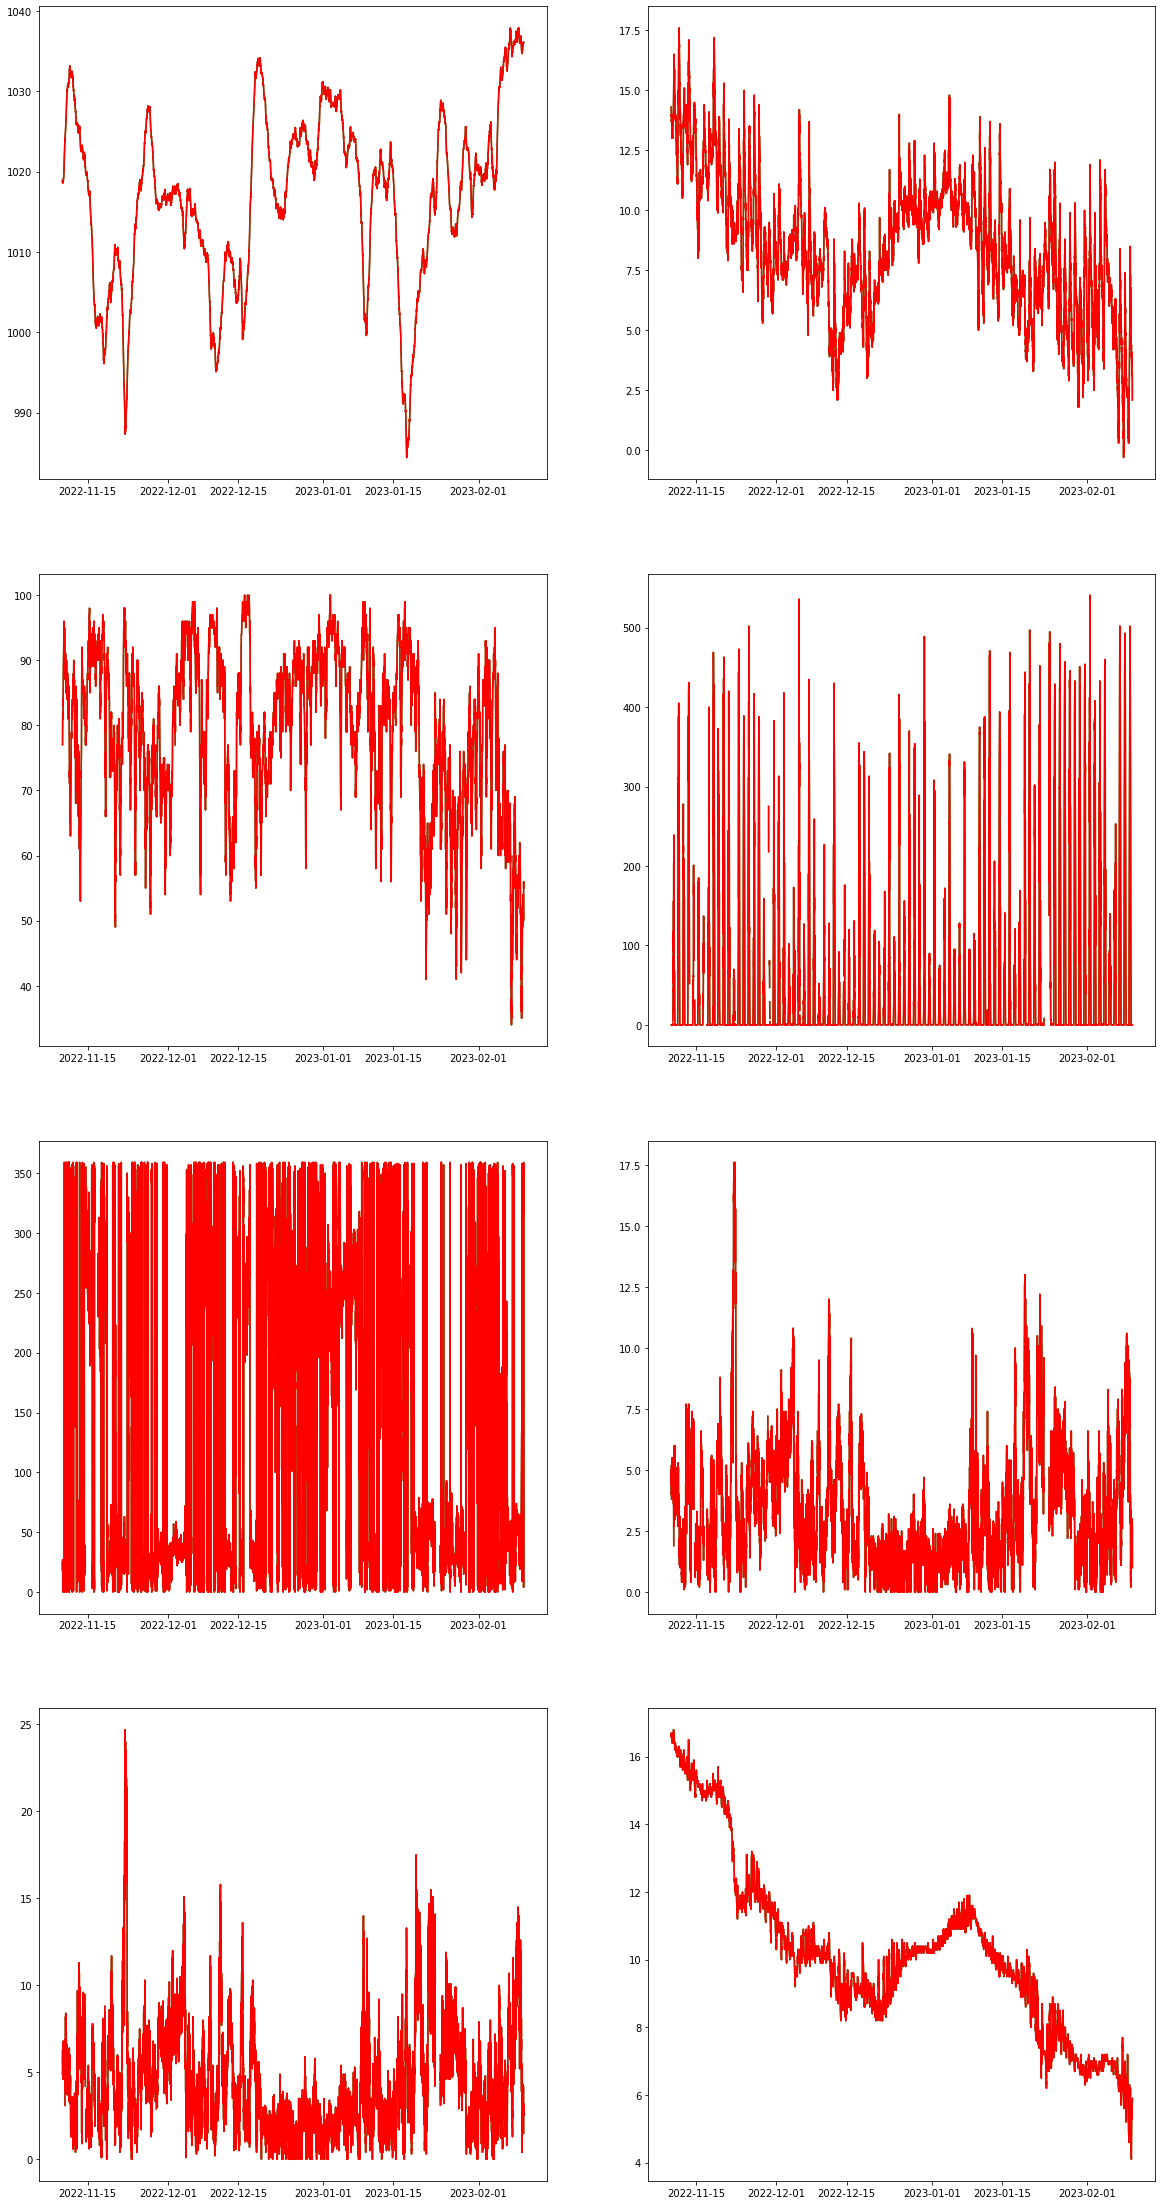

In [93]:
plt.figure(figsize=(20,40))

# Visualise duplicate columns across the datasets to see if there is a similarity
for i in range(len(duplicate_columns)):
    #Create redacted Dataframe to contain only dates and the target column data from meteo data
    redacted = pd.DataFrame() 
    redacted[duplicate_columns[i]] = meteo_data[duplicate_columns[i]]
    redacted['date'] = meteo_data.date

    #Create second redacted DataFrame to contain only dates and the target column data from astro tide consolidated data
    redacted_2 = pd.DataFrame()
    redacted_2['alt'] = astro_tide[duplicate_columns[i]] #Added 10 to see both plots visually
    redacted_2['date'] = astro_tide.date

    #Merge redacted data with corresponding data from astro tides consolidated data
    compare = redacted_2.merge(redacted, how='inner', on='date') 

    # Let us visualise the two redacted datasets for comparison
    plt.subplot(4,2,i+1)
    plt.plot(compare.date, compare[duplicate_columns[i]], 'g')
    plt.plot(compare.date, compare.alt,'r')

plt.show()

In all the duplicate columns, despite there being two plots, they all consolidate into one `red` line hiding the `green` line. This means that the data in the duplicate columns are similar and we do not need to add them to our consolidated astro_tides data.

## Final Data Preparation

In [ ]:
# Group data into hourly blocks with value maintained as the average of the hour
grouped = astro_tide.resample('H', on='date').value.mean()

df = pd.DataFrame()
df['date'] = np.array(grouped.index)
df['value'] = grouped.values

print(df.head())
print(df.tail())